In [25]:
#dependancies 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
import requests
import json

In [26]:
# Reading the csv file into a pandas DataFrame

csvdata = pd.read_csv('Resources/water_potability.csv')
csvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [27]:
# Statistical summary 
csvdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369481,32.879680,47.430000,176.847500,196.965000,216.670000,323.120000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

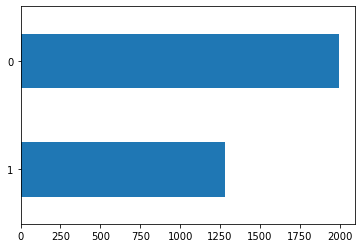

In [28]:
#Potability data

csvdata.Potability.value_counts().sort_values().plot(kind = 'barh')

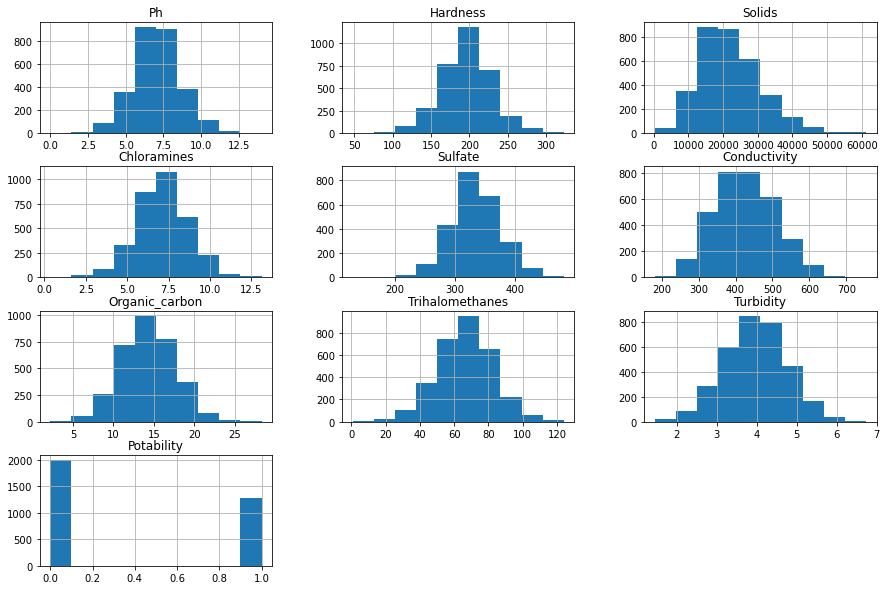

<Figure size 432x288 with 0 Axes>

In [29]:
#frequency distributtion 

csvdata.hist(figsize=(15,10))
plt.figure()
plt.show()

In [30]:
data = csvdata.isnull().sum()
data

Ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [31]:
data2 = csvdata.fillna(csvdata.mean())
data2

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.89,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.42,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.24,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.37,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.10,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.68,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.55,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.76,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.60,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [33]:
# Assign X (data) and y (target)
#identifying Independent and dependent Variable 

X = data2.drop("Potability", axis=1)
y = data2["Potability"]
print(X.shape, y.shape)

(3276, 9) (3276,)


In [34]:
# Splitting the dataset into training and test set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 27)

In [35]:
#feature Scaling  

from sklearn.preprocessing import StandardScaler
the_scaler = StandardScaler().fit(X_train)


X_train_sc = the_scaler.transform(X_train)
X_test_sc = the_scaler.transform(X_test)


columns = X.columns

X_train_df = pd.DataFrame(X_train, columns = columns)
X_test_df = pd.DataFrame(X_test, columns = columns)
X_train_df.head()

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2069,7.446089,179.15,17763.31099,9.876515,328.459022,364.134173,12.982491,49.051241,2.948657
3254,8.862113,131.64,17433.60185,7.639573,340.133165,399.462844,16.712206,53.594104,4.955082
1928,7.425102,204.49,18608.94087,7.434493,318.183297,338.935271,16.244755,94.605311,2.558773
896,7.027186,185.32,30988.97302,8.600477,327.462670,326.269080,9.982010,52.716589,5.353043
697,7.080795,182.53,20049.24210,8.480468,330.127869,328.700961,12.332288,79.784780,3.693511


In [36]:
X_test_df

,Ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
789,5.361212,171.32,24709.72886,4.184891,366.814979,490.658747,15.122672,33.119613,1.812529
413,5.742110,188.22,26831.61041,6.202721,318.376676,498.142386,9.657360,53.508523,3.323070
286,5.671774,216.04,15949.15318,7.500573,333.775777,372.535243,17.895724,77.457885,3.833160
2917,5.963479,223.03,24435.64208,6.221292,305.947013,284.497026,15.188557,40.142705,3.727813
3232,6.360196,198.91,13742.13949,7.441487,338.409576,423.625649,11.915900,57.713149,2.713248
...,...,...,...,...,...,...,...,...,...
803,7.804369,216.67,14160.68677,6.060144,281.355975,468.212537,15.147547,62.860627,4.075557
713,4.897692,169.24,14676.71627,8.318607,333.775777,437.538692,16.219141,81.947806,3.894464
2737,6.602540,174.63,21607.48324,6.581327,308.931421,657.570422,9.064445,68.827047,3.592496
1334,5.742533,182.94,21293.88975,6.826413,306.543071,435.234727,11.144072,68.612391,4.272203


k: 1, Train/Test Score: 1.000/0.613
k: 3, Train/Test Score: 0.800/0.591
k: 5, Train/Test Score: 0.754/0.640
k: 7, Train/Test Score: 0.727/0.616
k: 9, Train/Test Score: 0.719/0.613
k: 11, Train/Test Score: 0.708/0.617
k: 13, Train/Test Score: 0.704/0.617
k: 15, Train/Test Score: 0.703/0.620
k: 17, Train/Test Score: 0.695/0.620
k: 19, Train/Test Score: 0.698/0.617


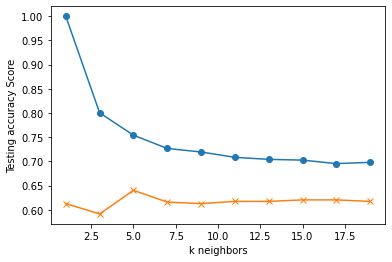

In [37]:
#KNN
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

#so here k in range will provide .... split in .... to give..

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_sc, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_sc, y_test))

k=15 Test Acc: 0.620


In [39]:
# Predicting the Test set results
knn_pred = knn.predict(X_test)


# Analyzing the output
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,classification_report 
print("R2 Score:",r2_score(y_test, knn_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test, knn_pred))
print("Accuracy:",accuracy_score(y_test, knn_pred)*100) 
print("Classification Report:\n",classification_report(y_test, knn_pred)) 

R2 Score: -1.3597122302158273
Mean Squared Error: 0.5762195121951219
Accuracy: 42.3780487804878
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.01       378
           1       0.42      1.00      0.59       278

    accuracy                           0.42       656
   macro avg       0.46      0.50      0.30       656
weighted avg       0.47      0.42      0.25       656

